# Assignment 2: Weather

Task: Create a jupyter notebook with a plot of the dryBulbTemperature_Celsius over time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime as dt

In [2]:
# Read in the csv file, parsing all the columns with dates and times as the datetime datatype.
# Set the index column to access datetime functionality.
df = pd.read_csv("data\weatherreadings1.csv", 
                 parse_dates = ['reportStartDateTime', 'reportEndDateTime', 'localReportEndDateTime', 'createdDateTime'],
                 index_col=['reportStartDateTime'])

In [3]:
# Explore the dataset
df.head(3)

,siteId,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,windSpeed_MilePerHour,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
reportStartDateTime,,,,,,,,,,,,,,,,,,,,,
2024-10-02 16:15:00+00:00,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,3.06,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02 16:15:00+00:00,1000013318,2024-10-02 16:15:28.567111900+00:00,1,12577570561
2024-10-02 16:45:00+00:00,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,2.81,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02 16:45:00+00:00,1000013318,2024-10-02 16:45:40.425161600+00:00,1,12577595550
2024-10-02 17:00:00+00:00,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,2.56,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02 17:00:00+00:00,1000013318,2024-10-02 17:01:12.337640500+00:00,1,12577608947


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2024-10-02 16:15:00+00:00 to 2024-10-03 15:00:00+00:00
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   siteId                          89 non-null     object             
 1   reportEndDateTime               89 non-null     datetime64[ns, UTC]
 2   collectionName                  89 non-null     int64              
 3   isPublic                        89 non-null     bool               
 4   isLatestVersion                 89 non-null     bool               
 5   observationType                 89 non-null     int64              
 6   softwareType                    89 non-null     object             
 7   windDirection                   89 non-null     int64              
 8   relativeHumidity                89 non-null     float64            
 9   windSpeed_MilePerHour           89 non-

In [5]:
df['dryBulbTemperature_Celsius'].agg(['min', 'max'])

min     9.166667
max    15.944444
Name: dryBulbTemperature_Celsius, dtype: float64

The csv file contains weather data from the Athenry station from 4.15 pm on the 2nd of October to 3pm on the 3rd October 2024.

what columns are needed? report start and end time are the same. 

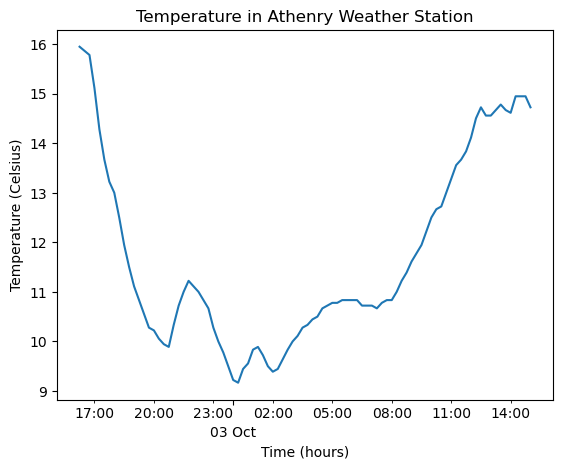

In [6]:
fig, ax = plt.subplots()

plt.plot(df.index, df['dryBulbTemperature_Celsius'])

ax.set(xlabel='Time (hours)',
       ylabel = 'Temperature (Celsius)',
       title = 'Temperature in Athenry Weather Station')


ax.tick_params(axis='x', which='minor', bottom=True)

# Minor ticks every 3 hours with the format of Hour:Minute
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=3)) 
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Major ticks on a new date
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 1))

plt.show()

### References



[Convert columns into datetime when using pandas to read csv files](https://khuyentran1401.github.io/Efficient_Python_tricks_and_tools_for_data_scientists/Chapter3/date_time.html)


https://stackoverflow.com/questions/72969795/matplotlib-wont-follow-date-format-set-by-set-major-formatter-or-set-minor-form

[Customize Dates on Times Series Plots in Python Using Matplotlib](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/)

[Matplottib won't show minor ticks when using subplots](https://stackoverflow.com/questions/56657712/matplotlib-wont-show-minor-ticks-when-using-subplots)

[How to turn on minor ticks on y axis](https://stackoverflow.com/questions/12711202/how-to-turn-on-minor-ticks-only-on-y-axis)

[matplotlib.dates](https://matplotlib.org/stable/api/dates_api.html)

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

[Tick locating and formatting](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter)